In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# To create interactive plots
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [3]:
keywords_data = pd.read_csv("C:/Users/user/Downloads/BTT/movies_keywords.csv")
keywords_data

,id,keywords
0,1,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,2,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,3,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,4,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,5,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...
46333,176269,"[{'id': 10703, 'name': 'tragic love'}]"
46334,176271,"[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
46335,176273,[]
46336,176275,[]


In [4]:
metadata = pd.read_csv("C:/Users/user/Downloads/BTT/movies_metadata.csv")
metadata

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,1,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,2,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,3,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,4,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,5,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45378,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,176269,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45379,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,176271,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45380,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,176273,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45381,False,NaN,0,[],NaN,176275,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [5]:
metadata.duplicated(subset = ['id'])

0        False
1        False
2        False
3        False
4        False
         ...  
45378    False
45379    False
45380    False
45381    False
45382    False
Length: 45383, dtype: bool

In [6]:
metadata.id.duplicated().sum()

30

In [7]:
metadata.loc[metadata.duplicated(subset = ['id'], keep = False), :].sort_values(by=['id'])

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
676,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,690,tt0111613,de,Das Versprechen,"East-Berlin, 1961, shortly after the erection ...",...,1995-02-16,0.0,115.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,"A love, a hope, a wall.",The Promise,False,5.0,1.0
1462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,690,tt0111613,de,Das Versprechen,"East-Berlin, 1961, shortly after the erection ...",...,1995-02-16,0.0,115.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,"A love, a hope, a wall.",The Promise,False,5.0,1.0
947,False,NaN,4,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,976,tt0022879,en,A Farewell to Arms,British nurse Catherine Barkley (Helen Hayes) ...,...,1932-12-08,25.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Every woman who has loved will understand,A Farewell to Arms,False,6.2,29.0
15040,False,NaN,4,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,976,tt0022879,en,A Farewell to Arms,British nurse Catherine Barkley (Helen Hayes) ...,...,1932-12-08,25.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Every woman who has loved will understand,A Farewell to Arms,False,6.2,29.0
20842,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,5848,tt0082992,en,Rich and Famous,Two literary women compete for 20 years: one w...,...,1981-09-23,0.0,115.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"From the very beginning, they knew they'd be f...",Rich and Famous,False,4.9,7.0
5699,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,5848,tt0082992,en,Rich and Famous,Two literary women compete for 20 years: one w...,...,1981-09-23,0.0,115.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"From the very beginning, they knew they'd be f...",Rich and Famous,False,4.9,7.0
9144,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,7587,tt0062229,fr,Le Samouraï,Hitman Jef Costello is a perfectionist who alw...,...,1967-10-25,39481.0,105.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,There is no solitude greater than that of the ...,Le Samouraï,False,7.9,187.0
7328,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,7587,tt0062229,fr,Le Samouraï,Hitman Jef Costello is a perfectionist who alw...,...,1967-10-25,39481.0,105.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,There is no solitude greater than that of the ...,Le Samouraï,False,7.9,187.0
9305,False,NaN,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",NaN,27528,tt0295682,en,The Warrior,"In feudal India, a warrior (Khan) who renounce...",...,2001-09-23,0.0,86.0,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Released,NaN,The Warrior,False,6.3,15.0
8050,False,NaN,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",NaN,27528,tt0295682,en,The Warrior,"In feudal India, a warrior (Khan) who renounce...",...,2001-09-23,0.0,86.0,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Released,NaN,The Warrior,False,6.3,15.0


In [8]:
metadata2 = metadata.drop_duplicates(subset = ['id'], keep = 'first')
metadata2

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,1,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,2,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,3,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,4,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,5,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45378,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,176269,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45379,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,176271,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45380,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,176273,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45381,False,NaN,0,[],NaN,176275,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [9]:
test_data = pd.read_csv("C:/Users/user/Downloads/BTT/test.csv")
test_data

,userId_movieId
0,469_2124
1,439_3753
2,522_1682
3,429_1217
4,71_1210
...,...
29997,305_2599
29998,22_2109
29999,534_2947
30000,558_4085


In [10]:
test_data_new = test_data
df_test= pd.concat([test_data_new,
                       test_data_new['userId_movieId'].str.split('_', expand=True)], 
                       axis = 1)
df_test.rename(columns={0:'userId', 1:'movieId'}, inplace=True)
df_test['userId'] = pd.to_numeric(df_test['userId'])
df_test['movieId'] = pd.to_numeric(df_test['movieId'])
df_test_new = df_test.drop(columns = ["userId_movieId"])
df_test_new

,userId,movieId
0,469,2124
1,439,3753
2,522,1682
3,429,1217
4,71,1210
...,...,...
29997,305,2599
29998,22,2109
29999,534,2947
30000,558,4085


In [11]:
train_data = pd.read_csv("C:/Users/user/Downloads/BTT/train.csv")
train_data

,userId_movieId,rating
0,10_1358,0.4
1,237_1544,0.7
2,54_373,1.0
3,11_2053,0.8
4,183_2524,0.6
...,...,...
69997,308_356,0.7
69998,500_223,0.6
69999,617_2722,1.0
70000,305_45987,0.8


In [12]:
keywords_data.isna().any()

id          False
keywords    False
dtype: bool

In [13]:
metadata.isna().any()

adult                    False
belongs_to_collection     True
budget                   False
genres                   False
homepage                  True
id                       False
imdb_id                  False
original_language         True
original_title           False
overview                  True
popularity                True
poster_path               True
production_companies      True
production_countries      True
release_date              True
revenue                   True
runtime                   True
spoken_languages          True
status                    True
tagline                   True
title                     True
video                     True
vote_average              True
vote_count                True
dtype: bool

In [14]:
keywords_data[keywords_data['keywords'].str.len() > 2]

,id,keywords
0,1,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,2,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,3,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,4,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,5,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...
46328,176255,"[{'id': 9748, 'name': 'revenge'}, {'id': 9826,..."
46329,176257,"[{'id': 224180, 'name': 'blair witch'}]"
46330,176259,"[{'id': 616, 'name': 'witch'}, {'id': 2035, 'n..."
46333,176269,"[{'id': 10703, 'name': 'tragic love'}]"


In [15]:
# From the keywords_data, excluded the empty list. 
# Assign the new dataframe to keywords_data_new
keywords_data_new = keywords_data[keywords_data['keywords'].str.len() > 2]
keywords_data_new

,id,keywords
0,1,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,2,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,3,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,4,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,5,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...
46328,176255,"[{'id': 9748, 'name': 'revenge'}, {'id': 9826,..."
46329,176257,"[{'id': 224180, 'name': 'blair witch'}]"
46330,176259,"[{'id': 616, 'name': 'witch'}, {'id': 2035, 'n..."
46333,176269,"[{'id': 10703, 'name': 'tragic love'}]"


Seems like each id in keywords are unique

1.Need to verify it's movie id.

2.Then what is the id of the top column

3.How do I use eval()

4.Are there common keywords in the keywords?(I assume to check this, you need to use eval() here)

In [16]:
keywords_data_new.loc[keywords_data_new.duplicated(subset = ['id'], keep = False), :].sort_values(by=['id'])

,id,keywords
676,690,"[{'id': 7059, 'name': 'anti-communism'}, {'id'..."
1462,690,"[{'id': 7059, 'name': 'anti-communism'}, {'id'..."
947,976,"[{'id': 131, 'name': 'italy'}, {'id': 428, 'na..."
15040,976,"[{'id': 131, 'name': 'italy'}, {'id': 428, 'na..."
20842,5848,"[{'id': 1253, 'name': 'roommate'}, {'id': 6054..."
...,...,...
4106,174533,"[{'id': 1262, 'name': 'mountain'}, {'id': 2802..."
45699,174543,"[{'id': 9663, 'name': 'sequel'}, {'id': 11451,..."
5524,174543,"[{'id': 9663, 'name': 'sequel'}, {'id': 11451,..."
24098,175813,"[{'id': 293, 'name': 'female nudity'}, {'id': ..."


In [17]:
keywords_data_new =keywords_data_new.drop_duplicates(subset = ['id'], keep = 'first')
keywords_data_new

,id,keywords
0,1,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,2,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,3,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,4,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,5,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...
46328,176255,"[{'id': 9748, 'name': 'revenge'}, {'id': 9826,..."
46329,176257,"[{'id': 224180, 'name': 'blair witch'}]"
46330,176259,"[{'id': 616, 'name': 'witch'}, {'id': 2035, 'n..."
46333,176269,"[{'id': 10703, 'name': 'tragic love'}]"


In [18]:
train_data_new = train_data
train_data_new

,userId_movieId,rating
0,10_1358,0.4
1,237_1544,0.7
2,54_373,1.0
3,11_2053,0.8
4,183_2524,0.6
...,...,...
69997,308_356,0.7
69998,500_223,0.6
69999,617_2722,1.0
70000,305_45987,0.8


In [19]:
df= pd.concat([train_data_new,
                       train_data_new['userId_movieId'].str.split('_', expand=True)], 
                       axis = 1)
df.rename(columns={0:'userId', 1:'movieId'}, inplace=True)
df['userId'] = pd.to_numeric(df['userId'])
df['movieId'] = pd.to_numeric(df['movieId'])

In [20]:
df

,userId_movieId,rating,userId,movieId
0,10_1358,0.4,10,1358
1,237_1544,0.7,237,1544
2,54_373,1.0,54,373
3,11_2053,0.8,11,2053
4,183_2524,0.6,183,2524
...,...,...,...,...
69997,308_356,0.7,308,356
69998,500_223,0.6,500,223
69999,617_2722,1.0,617,2722
70000,305_45987,0.8,305,45987


In [21]:
data = df.groupby('movieId')['rating'].count()

# Create trace
trace = go.Histogram(x = data.values,
                     name = 'Ratings',
                     xbins = dict(start = 0,
                                  end = 10000,
                                  size = 100),
                     marker = dict(color = '#db0000'))
# Create layout
layout = go.Layout(title = 'Distribution Of Ratings Per Movie',
                   xaxis = dict(title = 'Ratings Per Movie'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.2)


#plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

##### Ratings Per User #####
# Get data
data = df.groupby('userId')['rating'].count()

# Create trace
trace = go.Histogram(x = data.values,
                     name = 'Ratings',
                     xbins = dict(start = 0,
                                  end = 200,
                                  size = 2),
                     marker = dict(color = '#db0000'))
# Create layout
layout = go.Layout(title = 'Distribution Of Ratings Per User',
                   xaxis = dict(title = 'Ratings Per User'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.2)

# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [22]:
df_title = pd.merge(df, metadata2, how= 'left', left_on = 'movieId', right_on = 'id').drop(['id'], axis = 1)
df_title

,userId_movieId,rating,userId,movieId,adult,belongs_to_collection,budget,genres,homepage,imdb_id,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,10_1358,0.4,10,1358,False,NaN,1000000.0,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0117666,...,1996-08-30,24444121.0,135.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A simple man. A difficult choice.,Sling Blade,False,7.4,236.0
1,237_1544,0.7,237,1544,False,"{'id': 328, 'name': 'Jurassic Park Collection'...",73000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",NaN,tt0119567,...,1997-05-23,229074524.0,129.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Something has survived.,The Lost World: Jurassic Park,False,6.2,2528.0
2,54_373,1.0,54,373,False,NaN,8000000.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,tt0105226,...,1993-07-08,2000000.0,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Where nothing is as it seems.,Red Rock West,False,6.4,71.0
3,11_2053,0.8,11,2053,False,"{'id': 72119, 'name': 'Honey, I Shrunk the Kid...",40000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 35, '...",NaN,tt0104437,...,1992-07-16,58662452.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The BIG Laughs Start January 6th!,Honey I Blew Up the Kid,False,4.8,272.0
4,183_2524,0.6,183,2524,False,NaN,14000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt0072308,...,1974-12-14,116000000.0,159.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The world's tallest building is on fire. You a...,The Towering Inferno,False,7.1,230.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69997,308_356,0.7,308,356,False,NaN,55000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0109830,...,1994-07-06,677945399.0,142.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"The world will never be the same, once you've ...",Forrest Gump,False,8.2,8147.0
69998,500_223,0.6,500,223,False,"{'id': 182813, 'name': 'Clerks Collection', 'p...",27000.0,"[{'id': 35, 'name': 'Comedy'}]",http://www.miramax.com/movie/clerks/,tt0109445,...,1994-09-13,3151130.0,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just because they serve you doesn't mean they ...,Clerks,False,7.4,769.0
69999,617_2722,1.0,617,2722,False,NaN,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",NaN,tt0149261,...,1999-07-28,73648228.0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Bigger. Smarter. Faster. Meaner.,Deep Blue Sea,False,5.6,616.0
70000,305_45987,0.8,305,45987,False,NaN,0.0,"[{'id': 99, 'name': 'Documentary'}]",NaN,tt0092758,...,1987-01-01,0.0,120.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Chuck Berry: Hail! Hail! Rock 'n' Roll,False,8.4,5.0


In [23]:
df_train_new = df_title[["rating", "userId", "movieId", "genres", "title", "overview"]]
df_train_new

,rating,userId,movieId,genres,title,overview
0,0.4,10,1358,"[{'id': 18, 'name': 'Drama'}]",Sling Blade,Karl Childers is a mentally disabled man who h...
1,0.7,237,1544,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",The Lost World: Jurassic Park,Four years after Jurassic Park's genetically b...
2,1.0,54,373,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",Red Rock West,When a promised job for Texan Michael fails to...
3,0.8,11,2053,"[{'id': 12, 'name': 'Adventure'}, {'id': 35, '...",Honey I Blew Up the Kid,Wayne Szalinski is at it again. But instead of...
4,0.6,183,2524,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",The Towering Inferno,At the opening party of a colossal - but poorl...
...,...,...,...,...,...,...
69997,0.7,308,356,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",Forrest Gump,A man with a low IQ has accomplished great thi...
69998,0.6,500,223,"[{'id': 35, 'name': 'Comedy'}]",Clerks,Convenience and video store clerks Dante and R...
69999,1.0,617,2722,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",Deep Blue Sea,On a remote former submarine refueling facilit...
70000,0.8,305,45987,"[{'id': 99, 'name': 'Documentary'}]",Chuck Berry: Hail! Hail! Rock 'n' Roll,"St. Louis, 1986. For Chuck Berry's 60th, Keith..."


In [24]:
df_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70002 entries, 0 to 70001
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rating    70002 non-null  float64
 1   userId    70002 non-null  int64  
 2   movieId   70002 non-null  int64  
 3   genres    69850 non-null  object 
 4   title     69850 non-null  object 
 5   overview  69843 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 3.7+ MB


## Keep using metadata 

In [25]:
#discard the previous df_train_new dataframe
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer = 'word',stop_words = 'english')
metadata2['overview'].fillna('')
tfidf_matrix =  tfidf.fit_transform(df_train_new['overview'].values.astype('U'))
tfidf_matrix.shape


(70002, 27726)

In [26]:
from sklearn.metrics.pairwise import linear_kernel

cosin_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosin_sim[0]

array([1., 0., 0., ..., 0., 0., 0.])

In [27]:
len(cosin_sim)

70002

In [28]:
index_of_movies= pd.Series(metadata2.index, index=metadata2['id']).drop_duplicates()
index_of_movies
#Think I can sor it based on the movie Id and get similarity.

id
1             0
2             1
3             2
4             3
5             4
          ...  
176269    45378
176271    45379
176273    45380
176275    45381
176279    45382
Length: 45353, dtype: int64

In [29]:
# We have to check the case if the movie Id doesn't exist. 
def get_recommendations(movieId, cosin_sim=cosin_sim):
    idx = index_of_movies[movieId]
    
    sim_scores = list(enumerate(cosin_sim[idx]))
    # sorting of moviesidx based on similarity score
    sim_scores = sorted(sim_scores, key = lambda x:x[1], reverse = True)
    # get top 10 of sorted 
    sim_scores = sim_scores[1:3]
    
    movies_idx = [i[0] for i in sim_scores]
    
    return metadata2['title'].iloc[movies_idx]

In [30]:
get_recommendations(2).head(10)

580        Ghost
1853    Repo Man
Name: title, dtype: object

In [31]:
index_of_movies2= pd.Series(metadata2.index, index=metadata2['title']).drop_duplicates()
index_of_movies2

title
Toy Story                          0
Jumanji                            1
Grumpier Old Men                   2
Waiting to Exhale                  3
Father of the Bride Part II        4
                               ...  
Subdue                         45378
Century of Birthing            45379
Betrayal                       45380
Satan Triumphant               45381
Queerama                       45382
Length: 45353, dtype: int64

In [32]:
def get_recommendations2(title, cosin_sim=cosin_sim):
    idx = index_of_movies2[title]
    
    sim_scores = list(enumerate(cosin_sim[idx]))
    # sorting of moviesidx based on similarity score
    sim_scores = sorted(sim_scores, key = lambda x:x[1], reverse = True)
    # get top 10 of sorted 
    sim_scores = sim_scores[1:5]
    
    movies_idx = [i[0] for i in sim_scores]
    
    return metadata2['title'].iloc[movies_idx]

In [33]:
get_recommendations2('The Godfather').head(10)

1218       Unforgiven
1607        Anastasia
2607    Killer's Kiss
2788          L'ennui
Name: title, dtype: object

In [34]:
var = get_recommendations(1)
var

2447    The King and I
2713      Lucie Aubrac
Name: title, dtype: object

In [35]:
#Checking how many times it has paired with a user.
df_train_new.pivot_table(index = ['movieId'], aggfunc='size')

movieId
1         177
2          70
3          49
4          12
5          44
         ... 
161594      1
161918      1
161944      1
162672      1
163949      1
Length: 7961, dtype: int64

### Adding more features from metadatas

In [36]:
df_keyword = pd.merge( metadata2,keywords_data_new, how= 'left', left_on = 'id', right_on = 'id')
df_keyword

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,1,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,2,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,3,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,4,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,5,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45348,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,176269,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0,"[{'id': 10703, 'name': 'tragic love'}]"
45349,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,176271,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0,"[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
45350,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,176273,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0,NaN
45351,False,NaN,0,[],NaN,176275,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0,NaN


In [37]:
df_keyword2 = df_keyword
df_keyword2['keywords'].fillna(value= '[]', inplace = True)

In [38]:
# replace the nan values to '[]'
df_keyword2

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,1,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,2,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,3,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,4,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,5,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45348,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,176269,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0,"[{'id': 10703, 'name': 'tragic love'}]"
45349,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,176271,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0,"[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
45350,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,176273,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0,[]
45351,False,NaN,0,[],NaN,176275,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0,[]


In [39]:
# df_keyword['keywords'].replace("''", '[]')
# df_keyword['keywords']

In [40]:
from ast import literal_eval

features = [ 'keywords','genres']
for f in features:
    df_keyword2[f] = df_keyword2[f].apply(literal_eval)

In [41]:
def get_list(x):
    if isinstance(x, list):
        names = [ i['name'] for i in x]
        
        if len(names)  > 3:
            names = names[:3]
        return names
    return []

In [42]:
features = [ 'keywords','genres']
for f in features:
    df_keyword2[f] = df_keyword2[f].apply(get_list)

In [43]:
df_keyword2[['id', 'title', 'keywords', 'genres']].head()

,id,title,keywords,genres
0,1,Toy Story,"[jealousy, toy, boy]","[Animation, Comedy, Family]"
1,2,Jumanji,"[board game, disappearance, based on children'...","[Adventure, Fantasy, Family]"
2,3,Grumpier Old Men,"[fishing, best friend, duringcreditsstinger]","[Romance, Comedy]"
3,4,Waiting to Exhale,"[based on novel, interracial relationship, sin...","[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II,"[baby, midlife crisis, confidence]",[Comedy]


In [44]:
# striping
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(' ', '')) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(' ', ''))
        else:
            return ''

In [45]:
features = [ 'keywords', 'genres']
for f in features:
    df_keyword2[f] = df_keyword2[f].apply(clean_data)

In [46]:
def create_soup(x):
    return ' '.join(x['keywords'])+' '+' '.join(x['genres'])

df_keyword2['soup'] = df_keyword2.apply(create_soup, axis=1)

In [47]:
df_keyword2

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,keywords,soup
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[animation, comedy, family]",http://toystory.disney.com/toy-story,1,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[jealousy, toy, boy]",jealousy toy boy animation comedy family
1,False,NaN,65000000,"[adventure, fantasy, family]",NaN,2,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[boardgame, disappearance, basedonchildren'sbook]",boardgame disappearance basedonchildren'sbook ...
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[romance, comedy]",NaN,3,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[fishing, bestfriend, duringcreditsstinger]",fishing bestfriend duringcreditsstinger romanc...
3,False,NaN,16000000,"[comedy, drama, romance]",NaN,4,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[basedonnovel, interracialrelationship, single...",basedonnovel interracialrelationship singlemot...
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[comedy],NaN,5,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[baby, midlifecrisis, confidence]",baby midlifecrisis confidence comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45348,False,NaN,0,"[drama, family]",http://www.imdb.com/title/tt6209470/,176269,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0,[tragiclove],tragiclove drama family
45349,False,NaN,0,[drama],NaN,176271,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0,"[artist, play, pinoy]",artist play pinoy drama
45350,False,NaN,0,"[action, drama, thriller]",NaN,176273,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0,[],action drama thriller
45351,False,NaN,0,[],NaN,176275,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0,[],


In [120]:
metadata.loc[metadata['id'] ==96075 ]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count


In [121]:
df_test_new.loc[df_test_new['movieId']==96075]

,userId,movieId
1209,305,96075


In [123]:
df.loc[df['movieId']==96075]

,userId_movieId,rating,userId,movieId


In [48]:
# count vectorizer
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words = 'english')
count_matrix = count.fit_transform(df_keyword2['soup'])

In [49]:
count_matrix

<45353x9874 sparse matrix of type '<class 'numpy.int64'>'
	with 161216 stored elements in Compressed Sparse Row format>

In [50]:
count_matrix2 = count_matrix.astype(np.uint8)
count_matrix2

<45353x9874 sparse matrix of type '<class 'numpy.uint8'>'
	with 161216 stored elements in Compressed Sparse Row format>

In [51]:
from sklearn.metrics.pairwise import cosine_similarity

In [52]:
cosin_sim2 = cosine_similarity(count_matrix2, count_matrix2).astype(np.uint8)

In [53]:
cosin_sim2.shape

(45353, 45353)

In [54]:
df_keyword2 = df_keyword2.reset_index()
indx = pd.Series(df_keyword2.index, index = df_keyword2['title']) 

In [57]:
indx2 = pd.Series(df_keyword2.index, index =df_keyword2['id']) 

In [58]:
indx2

id
1             0
2             1
3             2
4             3
5             4
          ...  
176269    45348
176271    45349
176273    45350
176275    45351
176279    45352
Length: 45353, dtype: int64

In [59]:
get_recommendations2('Toy Story', cosin_sim2).head(10)

1                        Jumanji
2               Grumpier Old Men
3              Waiting to Exhale
4    Father of the Bride Part II
Name: title, dtype: object

In [60]:
get_recommendations(2, cosin_sim2).head(10)

1             Jumanji
2    Grumpier Old Men
Name: title, dtype: object

### Collaborative Filtering

In [61]:
df.dtypes

userId_movieId     object
rating            float64
userId              int64
movieId             int64
dtype: object

In [62]:
df_new = df[['userId', 'movieId', 'rating']]
df_new

,userId,movieId,rating
0,10,1358,0.4
1,237,1544,0.7
2,54,373,1.0
3,11,2053,0.8
4,183,2524,0.6
...,...,...,...
69997,308,356,0.7
69998,500,223,0.6
69999,617,2722,1.0
70000,305,45987,0.8


In [63]:
rating = df_new

In [64]:
from surprise import SVD
from surprise.model_selection import cross_validate
from surprise import  Dataset, Reader

from surprise.model_selection import GridSearchCV
from surprise import NMF


import collections
import matplotlib.pyplot as plt
import numpy as np

In [65]:
#filtering data 
min_user_ratings = 5
min_movie_ratings = 3

ratings_flrd_df = rating.groupby("movieId").filter(lambda x: x["movieId"].count() 
                                                  >= min_movie_ratings)
ratings_flrd_df = rating.groupby("movieId").filter(lambda x: x["movieId"].count() 
                                                  >= min_user_ratings)

In [66]:
"{0} movies deleted; all movies are now rated at least: {1} times. Old dimensions: {2}; New dimensions: {3}"\
.format(len(rating.movieId.value_counts()) - len(ratings_flrd_df.movieId.value_counts())\
        ,min_movie_ratings,rating.shape, ratings_flrd_df.shape )

'5100 movies deleted; all movies are now rated at least: 3 times. Old dimensions: (70002, 3); New dimensions: (60985, 3)'

In [67]:
#Data Loading 
reader = Reader(rating_scale = (0.0, 1.0))
data = Dataset.load_from_df(ratings_flrd_df[['userId', 'movieId', 'rating']], reader)

trainset= data.build_full_trainset()
testset = trainset.build_anti_testset()

In [21]:
#Find the best parameter 
#def rmse_vs_factors(algorithm, data):
#    rmse_algorithm = []
#    for k in range(1, 101, 1):
#        algo = algorithm(n_factors = k)
#        
#        loss_fce = cross_validate(algo, data, measures=['RMSE'], cv = 5, verbose = False)["test_rmse"].mean()
#        rmse_algorithm.append(loss_fce)
#        
#    return rmse_algorithm

In [68]:
param_grid = {'n_factors' : [4, 6, 9, 11, 14, 18, 29]}
gridSearch = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv=5)
gridSearch.fit(data)

print (gridSearch.best_score['rmse'])

print(gridSearch.best_params['rmse'])

0.1762831454745771
{'n_factors': 4}


In [69]:
algo_SVD = SVD(n_factors = 4)
algo_SVD.fit(trainset)

#predict ratings for all pairs(i,j) that are not in the training set
testset = trainset.build_anti_testset()

predictions = algo_SVD.test(testset)

predictions[0:2]

[Prediction(uid=10, iid=1544, r_ui=0.7176059686808232, est=0.42427020204425564, details={'was_impossible': False}),
 Prediction(uid=10, iid=373, r_ui=0.7176059686808232, est=0.6352112267959011, details={'was_impossible': False})]

In [70]:
cross_validate(algo_SVD, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.1761  0.1763  0.1777  0.1764  0.1753  0.1763  0.0008  
Fit time          0.12    0.12    0.12    0.12    0.14    0.12    0.01    
Test time         0.05    0.05    0.05    0.04    0.05    0.05    0.00    


{'test_rmse': array([0.17608741, 0.17632323, 0.17767463, 0.17635221, 0.17525275]),
 'fit_time': (0.12167477607727051,
  0.12466669082641602,
  0.118682861328125,
  0.12267160415649414,
  0.13663434982299805),
 'test_time': (0.0468745231628418,
  0.04587697982788086,
  0.04587697982788086,
  0.04488015174865723,
  0.04787182807922363)}

In [71]:
algo_SVD.predict(1, 302)

Prediction(uid=1, iid=302, r_ui=None, est=0.7330779923081415, details={'was_impossible': False})

In [72]:
algo_SVD.predict(2, 5000)

Prediction(uid=2, iid=5000, r_ui=None, est=0.6254534414151326, details={'was_impossible': False})

In [24]:
# Will use it later. 
#predict_test = algo_SVD.predict(uid = 11,r_ui=None, iid = '1000')
#predict_test

Prediction(uid=11, iid='1000', r_ui=None, est=0.7303743829558691, details={'was_impossible': False})

## Hybrid Method

In [73]:
df_test_new

,userId,movieId
0,469,2124
1,439,3753
2,522,1682
3,429,1217
4,71,1210
...,...,...
29997,305,2599
29998,22,2109
29999,534,2947
30000,558,4085


In [494]:
#index map => fix it to the one have entire movie list 
#index_map = df_test_new.set_index('userId')
#index_map

In [74]:
var3 = pd.DataFrame(index_of_movies2)

In [75]:
var3.rename(columns = {0: "id"})
var3

,0
title,
Toy Story,0
Jumanji,1
Grumpier Old Men,2
Waiting to Exhale,3
Father of the Bride Part II,4
...,...
Subdue,45378
Century of Birthing,45379
Betrayal,45380


In [76]:
index_map = index_of_movies
index_map

id
1             0
2             1
3             2
4             3
5             4
          ...  
176269    45378
176271    45379
176273    45380
176275    45381
176279    45382
Length: 45353, dtype: int64

In [77]:
index_of_movies

id
1             0
2             1
3             2
4             3
5             4
          ...  
176269    45378
176271    45379
176273    45380
176275    45381
176279    45382
Length: 45353, dtype: int64

In [78]:
movie_id = metadata2[["title", "id"]]
movie_id

,title,id
0,Toy Story,1
1,Jumanji,2
2,Grumpier Old Men,3
3,Waiting to Exhale,4
4,Father of the Bride Part II,5
...,...,...
45378,Subdue,176269
45379,Century of Birthing,176271
45380,Betrayal,176273
45381,Satan Triumphant,176275


In [79]:
# Putting index( id of the movie ) and it will return the index of the metadata.
index_of_movies[176275]

45381

In [80]:
index_map = movie_id

In [81]:
print(index_map.loc[13945]['id'])

70344


In [165]:
def recommend_for(userId,movieId):
#     index = index_of_movies[title]
#     tmdbId = movie_id.loc[title]['id']
    index = index_of_movies[movieId]

    # content based
    sim_scores = list(enumerate(cosin_sim2[int(index)]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    
    mv =metadata2.iloc[movie_indices][['title', 'vote_count', 'vote_average', 'id']]
    #mv = mv[mv['id'].isin(df_test_new['movieId'])]
    
#     # CF
    mv['est'] = mv['id'].apply(lambda x: algo_SVD.predict(userId, x).est)
    mv = mv.sort_values('est', ascending=False)
    
    return mv.head()
    

In [167]:
recommend_for(2, 1210)

,title,vote_count,vote_average,id,est
27,Persuasion,36.0,7.4,28,0.732469
16,Sense and Sensibility,364.0,7.2,17,0.714340
0,Toy Story,5415.0,7.7,1,0.703470
24,Leaving Las Vegas,365.0,7.1,25,0.684574
15,Casino,1343.0,7.8,16,0.682190


In [84]:
algo_SVD.predict(2, 158988)

Prediction(uid=2, iid=158988, r_ui=None, est=0.6254534414151326, details={'was_impossible': False})

In [168]:
recommend_for(486, 119145)

,title,vote_count,vote_average,id,est
13158,The Forgotten One,0.0,0.0,64611,0.809945
13307,The Unborn,373.0,4.8,65813,0.809945
38999,Dark Signal,13.0,3.7,159799,0.809945
38567,The Offering,33.0,4.5,158619,0.809945
38000,Observance,12.0,5.4,157065,0.809945


## Making prediction with test dataset2


In [101]:
def recommend_for_est(userId,movieId):
#     index = index_of_movies[title]
#     tmdbId = movie_id.loc[title]['id']
    index = index_of_movies[movieId]

    # content based
    sim_scores = list(enumerate(cosin_sim2[int(index)]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:5]
    movie_indices = [i[0] for i in sim_scores]
    #movie_indices = sim_scores[1]
    
    mv = metadata2.iloc[movie_indices][['id']]
    mv = mv[mv['id'].isin(df_test_new['movieId'])]
    
#     # CF
    mv['est'] = mv['id'].apply(lambda x: algo_SVD.predict(userId, x).est)
    mv = mv.sort_values('est', ascending=False)
    
    return mv.iloc[0]['est']
    

In [102]:
recommend_for_est(2, 1210)

0.7034700562662559

In [87]:
df_test_new

,userId,movieId
0,469,2124
1,439,3753
2,522,1682
3,429,1217
4,71,1210
...,...,...
29997,305,2599
29998,22,2109
29999,534,2947
30000,558,4085


In [88]:
index = index_of_movies[1217]
index

1171

In [547]:
#recommend_for_est(429, 1217)

In [89]:
algo_SVD.predict(429,1217)

Prediction(uid=429, iid=1217, r_ui=None, est=0.8899243034765513, details={'was_impossible': False})

In [94]:
metadata2.iloc[12556]

adult                                                                False
belongs_to_collection                                                  NaN
budget                                                             7000000
genres                                       [{'id': 18, 'name': 'Drama'}]
homepage                                                               NaN
id                                                                   59313
imdb_id                                                          tt0436889
original_language                                                       de
original_title                                           Die weisse Massai
overview                 A girl, Carola, whose vacation in Kenya takes ...
popularity                                                        1.195186
poster_path                               /Aw1PRBrbLj26ZOU7lc76VpSzN5g.jpg
production_companies     [{'name': 'Constantin Film Produktion', 'id': ...
production_countries     

In [95]:
mv = metadata2.iloc[movie_indices][['id']]
mv

,id
1171,1217
0,1
1,2
2,3
3,4
...,...
45378,176269
45379,176271
45380,176273
45381,176275


In [96]:
len(sim_scores)

45353

In [99]:
def recommend_for_est2(userId,movieId):
#     index = index_of_movies[title]
#     tmdbId = movie_id.loc[title]['id']
    index = index_of_movies[movieId]

    # content based
    sim_scores = list(enumerate(cosin_sim2[int(index)]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:10]
    movie_indices = [i[0] for i in sim_scores]
    
    mv = metadata.iloc[movie_indices][['id']]
    mv = mv[mv['id'].isin(df_test_new['movieId'])]
    
#     # CF
#     mv['est'] = mv['id'].apply(lambda x: algo_SVD.predict(userId, x).est)
#     mv = mv.sort_values('est', ascending=False)
    
    return mv['id'].iloc[0]

In [100]:
recommend_for_est2(429, 1217)
# var['id'].iloc[0]

1

In [134]:
#Check the movieId is in the original data
boolean = 1217 in movie_id['id'].values
boolean 

True

In [138]:
def recommend_for2(userId,movieId):
#     index = index_of_movies[title]
#     tmdbId = movie_id.loc[title]['id']
    boolean = movieId in movie_id['id'].values
    if boolean :
        index = index_of_movies[movieId]

        # content based
        sim_scores = list(enumerate(cosin_sim2[int(index)]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:5]
        movie_indices = [i[0] for i in sim_scores]

        mv =metadata2.iloc[movie_indices][['title', 'vote_count', 'vote_average', 'id']]
        #mv = mv[mv['id'].isin(df_test_new['movieId'])]

    #     # CF
        mv['est'] = mv['id'].apply(lambda x: algo_SVD.predict(userId, x).est)
        mv = mv.sort_values('est', ascending=False)

        return mv.head().iloc[0]['est']
    else :
        pred = algo_SVD.predict(userId, movieId)
        return pred.est

In [178]:
def recommend_for3(userId,movieId):
#     index = index_of_movies[title]
#     tmdbId = movie_id.loc[title]['id']
    boolean = movieId in movie_id['id'].values
    if boolean :
        index = index_of_movies[movieId]

        # content based
        sim_scores = list(enumerate(cosin_sim2[int(index)]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:31]
        movie_indices = [i[0] for i in sim_scores]

        mv =metadata2.iloc[movie_indices][['title', 'vote_count', 'vote_average', 'id']]
        mv = mv[mv['id'].isin(df_test_new['movieId'])]

    #     # CF
        mv['est'] = mv['id'].apply(lambda x: algo_SVD.predict(userId, x).est)
        mv = mv.sort_values('est', ascending=False)

        return mv.head()
    else :
        pred = algo_SVD.predict(userId, movieId)
        return pred.est

In [179]:
recommend_for3(429,1217)

,title,vote_count,vote_average,id,est
16,Sense and Sensibility,364.0,7.2,17,0.862102
27,Persuasion,36.0,7.4,28,0.832933
0,Toy Story,5415.0,7.7,1,0.825965
28,The City of Lost Children,308.0,7.6,29,0.808418
5,Heat,1886.0,7.7,6,0.805077


In [140]:
pred_list = []
for index, row in df_test_new.iterrows():
    #print(index, row , recommend_for2(row['userId'], row['movieId']))
    pred_list.append(recommend_for2(row['userId'], row['movieId']))


In [144]:
# df_test_new.loc[df_test_new['movieId']==96075]

In [145]:
# pred = algo_SVD.predict(305, 96075)
# pred
#algo_SVD.predict(429,1217)

In [146]:
# pred.est

In [147]:
len(pred_list)

30002

In [160]:
test_data2 = pd.read_csv("C:/Users/user/Downloads/BTT/test.csv")
test_data2

,userId_movieId
0,469_2124
1,439_3753
2,522_1682
3,429_1217
4,71_1210
...,...
29997,305_2599
29998,22_2109
29999,534_2947
30000,558_4085


In [161]:
test_data2['rating'] = pred_list
test_data2

,userId_movieId,rating
0,469_2124,0.768687
1,439_3753,0.744596
2,522_1682,0.870996
3,429_1217,0.825965
4,71_1210,0.793167
...,...,...
29997,305_2599,0.745161
29998,22_2109,0.735297
29999,534_2947,0.819721
30000,558_4085,0.799770


In [162]:
test_data2.to_csv('predictions_new.csv', index=False)

## Making prediction with test dataset

In [25]:
def predict_test_ratings(userId, movieId):
    new_rating = algo_SVD.predict(uid = userId, iid=movieId)
    return new_rating

In [26]:
df_test_svd = [predict_test_ratings(userId, movieId)
              for userId, movieId in zip(df_test_new['userId'],
                                        df_test_new['movieId'])]

In [27]:
def get_top_n(predictions):
    #1, map the predictions to each user.
    #pred_list = collections.defaultdict(list)
    pred_list = []

    for uid, iid, true_r, est, _ in predictions: 
        #pred_list[uid].append((iid, est))
        pred_list.append([uid, iid, est])
        
    #4. Data Frame with predictions
    #preds_df = pd.DataFrame([(id, pair[0], pair[1]) for id, row in pred_list.items() for pair in row],
    #                       columns = ["userId", "movieId", "rat_pred"])
    preds_df = pd.DataFrame(pred_list,
                           columns = ["userId", "movieId", "rat_pred"])
    
    return  preds_df

In [28]:
pred_test = get_top_n(df_test_svd)

In [29]:
pred_test

,userId,movieId,rat_pred
0,469,2124,0.642635
1,439,3753,0.731703
2,522,1682,0.920323
3,429,1217,0.909066
4,71,1210,0.825886
...,...,...,...
29997,305,2599,0.766431
29998,22,2109,0.765937
29999,534,2947,0.782170
30000,558,4085,0.720362


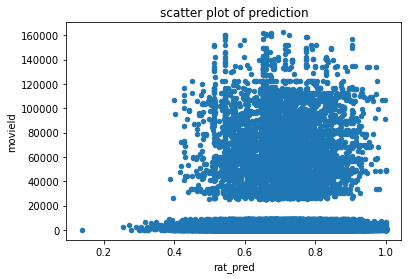

In [30]:
import matplotlib.pyplot as plot
pred_test.plot.scatter(x='rat_pred', y='movieId',
                   title='scatter plot of prediction')
plot.show(block=True)

In [31]:
final_result = test_data
final_result['rating'] = pred_test['rat_pred']
final_result

,userId_movieId,rating
0,469_2124,0.642635
1,439_3753,0.731703
2,522_1682,0.920323
3,429_1217,0.909066
4,71_1210,0.825886
...,...,...
29997,305_2599,0.766431
29998,22_2109,0.765937
29999,534_2947,0.782170
30000,558_4085,0.720362


In [32]:
final_result.to_csv('predictions.csv', index=False)

In [33]:
final_result 

,userId_movieId,rating
0,469_2124,0.642635
1,439_3753,0.731703
2,522_1682,0.920323
3,429_1217,0.909066
4,71_1210,0.825886
...,...,...
29997,305_2599,0.766431
29998,22_2109,0.765937
29999,534_2947,0.782170
30000,558_4085,0.720362
